In [171]:
import torch
from torch import nn #(https://docs.pytorch.org/docs/stable/nn.html)
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-white')

print("PyTorch version:", torch.__version__)


PyTorch version: 2.5.1+cu121


In [172]:
def get_device(prefer_gpu=True, index=0, verbose=True):
    if prefer_gpu and torch.cuda.is_available():
        device = torch.device(f"cuda:{index}")
    else:
        device = torch.device("cpu")
    if verbose:
        print(f"Using device: {device}")
    return device

device = get_device(prefer_gpu=True, index=0, verbose=True)

Using device: cuda:0


## 📌 **Linear Regression 
---
### ✅ **1️⃣ Model Equation**
The **hypothesis function** for simple linear regression is:
$$
\hat{y} = wx + b
$$
* $\hat{y}$ — predicted output
* $x$ — input feature (independent variable)
* $w$ — weight (slope)
* $b$ — bias (intercept)
---
**💡 Intuition:**
* **Weight $w$** controls how much the input $x$ influences the output.
* **Bias $b$** shifts the line up or down to fit the data.
---
### ✅ **2️⃣ Dataset**
Suppose we have $m$ training examples:
$$
\{(x^{(i)}, y^{(i)})\}_{i=1}^m
$$
* $x^{(i)}$ — input of example $i$
* $y^{(i)}$ — actual target of example $i$
---
### ✅ **3️⃣ Cost Function (MSE)**
We use **Mean Squared Error (MSE)** to measure how good our line is:
$$
J(w, b) = \frac{1}{2m} \sum_{i=1}^{m} \Big( \hat{y}^{(i)} - y^{(i)} \Big)^2
= \frac{1}{2m} \sum_{i=1}^{m} \Big( wx^{(i)} + b - y^{(i)} \Big)^2
$$
* $J(w,b)$ — cost (loss)
* The factor $\frac{1}{2}$ makes the math cleaner for derivatives.
---
### ✅ **4️⃣ Goal**
Find $w$ and $b$ that **minimize** the cost function $J(w, b)$.
In other words, find the line that best fits the training data.
---
### ✅ **5️⃣ Gradient Descent Update Rules**
To minimize $J$, we compute the gradients (partial derivatives) and update:
$$
\frac{\partial J}{\partial w} = \frac{1}{m} \sum_{i=1}^{m} \Big( \hat{y}^{(i)} - y^{(i)} \Big) x^{(i)}
$$
$$
\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} \Big( \hat{y}^{(i)} - y^{(i)} \Big)
$$
**Update step for each iteration:**
$$
w := w - \alpha \frac{\partial J}{\partial w}
\quad
,\quad
b := b - \alpha \frac{\partial J}{\partial b}
$$
* $\alpha$ — learning rate (controls step size)
---
### ✅ **6️⃣ Vectorized Form (Multiple Features)**
For multiple features (**multivariate linear regression**):
$$
\hat{y} = w_1 x_1 + w_2 x_2 + \dots + w_n x_n + b
\quad
\text{or}
\quad
\hat{y} = \mathbf{w}^\top \mathbf{x} + b
$$
* $\mathbf{w} \in \mathbb{R}^n$ — weight vector
* $\mathbf{x} \in \mathbb{R}^n$ — input feature vector
---
### ✅ **7️⃣ Closed-Form Solution (Normal Equation)**
When using all data at once, you can solve for $\mathbf{w}$ directly (no gradient descent):
$$
\mathbf{w} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}
$$
* $\mathbf{X} \in \mathbb{R}^{m \times n}$ — design matrix
* $\mathbf{y} \in \mathbb{R}^{m}$ — target vector
---
## ✅ **Linear Regression Core Idea**

> Find the line (or hyperplane) that **best fits the data** by minimizing the average squared error between predictions and true labels.



In [173]:
# Create linear data
WEIGHTS = 0.7
BIAS = 0.3
START = 0
END = 1
STEP = 0.02

X = torch.arange(START, END, STEP).unsqueeze(dim=1)
y = WEIGHTS * X + BIAS

print("X:", X[:10])
print("Y:", y[:10])

X: tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])
Y: tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])


In [174]:
len(X), len(y)

(50, 50)

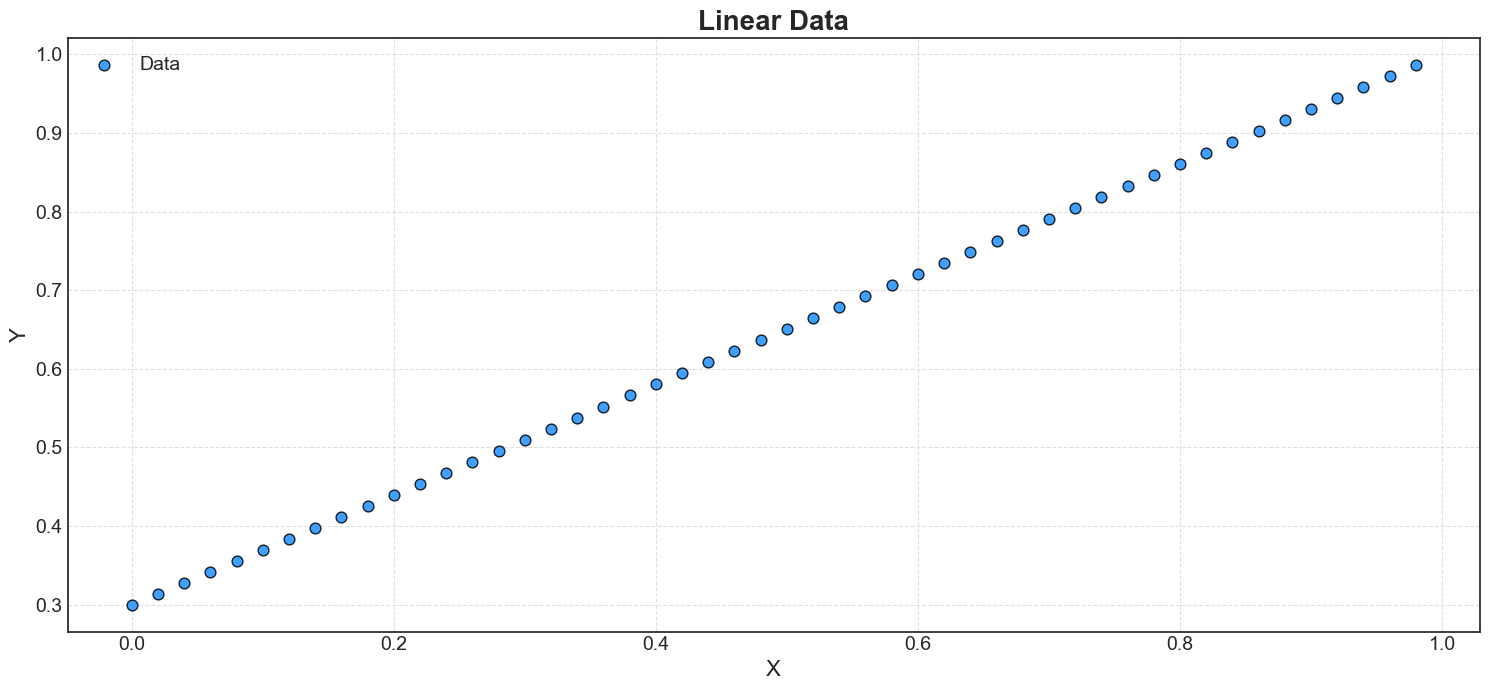

In [175]:
def plot_labeled_linear_splits(data_splits):
    """
    Plot multiple labeled linear data splits on the same scatter plot.

    Args:
        data_splits (dict): Dictionary where keys are labels (str) and
                            values are tuples (x, y, color).
    """
    plt.figure(figsize=(15, 7))
    for label, (xs, ys, color) in data_splits.items():
        assert len(xs) == len(ys), f"Mismatched lengths for {label}"
        plt.scatter(xs, ys, c=color, s=60, edgecolor='k', alpha=0.85, label=label)
    plt.title("Linear Data", fontsize=20, fontweight='bold')
    plt.xlabel("X", fontsize=16)
    plt.ylabel("Y", fontsize=16)
    plt.legend(fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.tight_layout()
    plt.show()

all_linear_data = {
    "Data": (X, y, "dodgerblue"),
}
plot_labeled_linear_splits(all_linear_data)

In [176]:
# create splits
tarin_split=int(len(X) * 0.8)

x_train, x_test = X[:tarin_split], X[tarin_split:]
y_train, y_test = y[:tarin_split], y[tarin_split:]
print(f"Train set size: {len(x_train),len(y_train)}, Test set size: {len(x_test),len(y_test)}")

Train set size: (40, 40), Test set size: (10, 10)


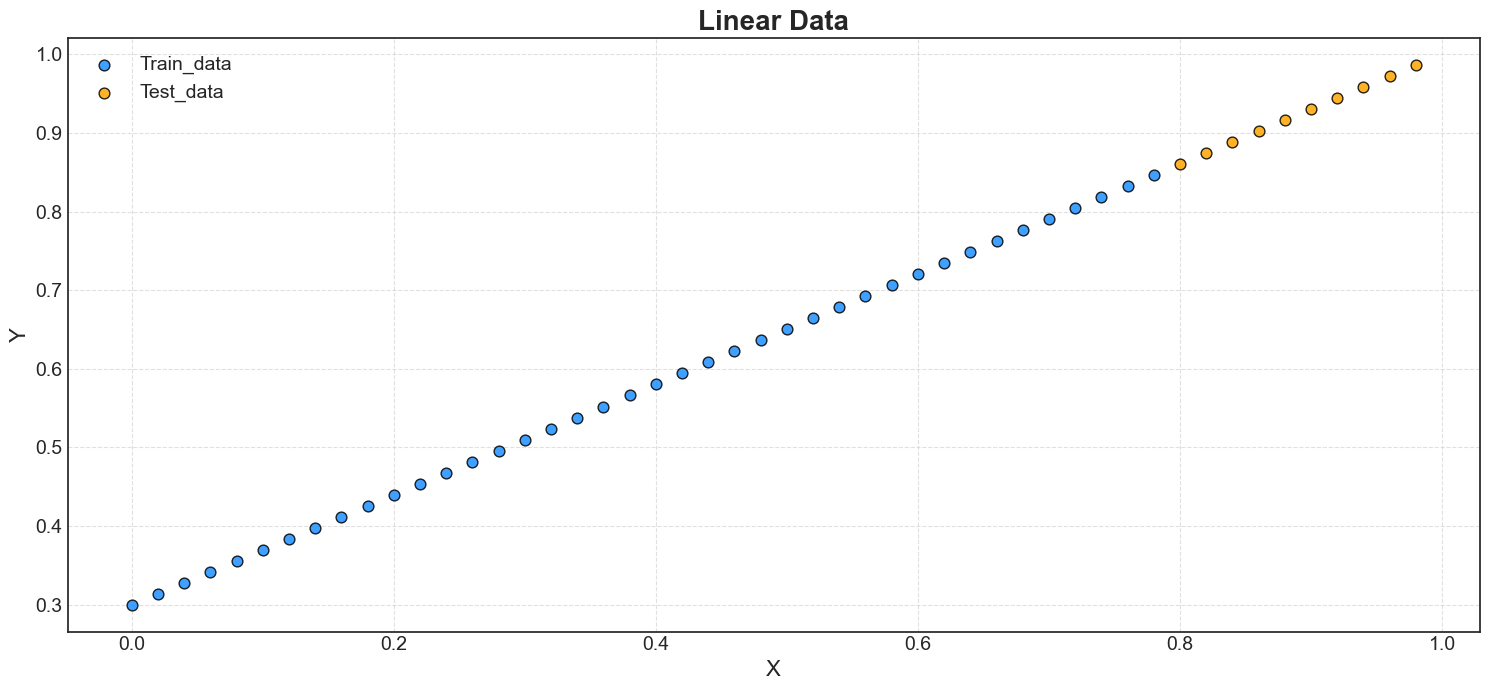

In [177]:
data_dict = {
    "Train_data": (x_train, y_train, "dodgerblue"),
    "Test_data": (x_test, y_test, "orange"),
}
plot_labeled_linear_splits(data_dict)

In [178]:
import torch
from torch import nn

# Our first PyTorch linear regression model
class LinearRegressionModel(nn.Module):  # <= All PyTorch models must inherit from nn.Module, which provides the core neural network building blocks
    def __init__(self):
        super().__init__()  # <= Calls the __init__ method of nn.Module to properly initialize the base class

        # Define the weight parameter (slope 'w' in y = wx + b)
        # nn.Parameter wraps a tensor to tell PyTorch this is a learnable parameter
        # torch.randn(1) initializes it with a random value from a normal distribution
        self.weights = nn.Parameter(
            torch.randn(1, dtype=torch.float32, requires_grad=True),  # <= requires_grad=True enables gradient computation for backpropagation
            requires_grad=True  # <= This is redundant here (Parameter sets it True by default) but shown for explicitness
        )

        # Define the bias parameter (intercept 'b' in y = wx + b)
        self.bias = nn.Parameter(
            torch.randn(1, dtype=torch.float32, requires_grad=True),
            requires_grad=True  # <= Same note: redundant but clarifies intent
        )

    def forward(self, X: torch.Tensor) -> torch.Tensor:#<= any PyTorch model must implement a forward method that overrides nn.Module's forward method
        """
        Forward pass: computes the predicted output given input X.
        Linear regression equation: y = w * X + b
        """
        return self.weights * X + self.bias


### PyTorch model building essentials

PyTorch has four (give or take) essential modules you can use to create almost any kind of neural network you can imagine.

They are [`torch.nn`](https://pytorch.org/docs/stable/nn.html), [`torch.optim`](https://pytorch.org/docs/stable/optim.html), [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) and [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html). For now, we'll focus on the first two and get to the other two later (though you may be able to guess what they do).

| PyTorch module | What does it do? |
| ----- | ----- |
| [`torch.nn`](https://pytorch.org/docs/stable/nn.html) | Contains all of the building blocks for computational graphs (essentially a series of computations executed in a particular way). |
| [`torch.nn.Parameter`](https://pytorch.org/docs/stable/generated/torch.nn.parameter.Parameter.html#parameter) | Stores tensors that can be used with `nn.Module`. If `requires_grad=True` gradients (used for updating model parameters via [**gradient descent**](https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html))  are calculated automatically, this is often referred to as "autograd".  | 
| [`torch.nn.Module`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module) | The base class for all neural network modules, all the building blocks for neural networks are subclasses. If you're building a neural network in PyTorch, your models should subclass `nn.Module`. Requires a `forward()` method be implemented. | 
| [`torch.optim`](https://pytorch.org/docs/stable/optim.html) | Contains various optimization algorithms (these tell the model parameters stored in `nn.Parameter` how to best change to improve gradient descent and in turn reduce the loss). | 
| `def forward()` | All `nn.Module` subclasses require a `forward()` method, this defines the computation that will take place on the data passed to the particular `nn.Module` (e.g. the linear regression formula above). |

If the above sounds complex, think of like this, almost everything in a PyTorch neural network comes from `torch.nn`,
* `nn.Module` contains the larger building blocks (layers)
* `nn.Parameter` contains the smaller parameters like weights and biases (put these together to make `nn.Module`(s))
* `forward()` tells the larger blocks how to make calculations on inputs (tensors full of data) within  `nn.Module`(s)
* `torch.optim` contains optimization methods on how to improve the parameters within `nn.Parameter` to better represent input data 


> **Resource:** See more of these essential modules and their use cases in the [PyTorch Cheat Sheet](https://pytorch.org/tutorials/beginner/ptcheat.html). 


In [179]:
SEED=42
torch.manual_seed(SEED)
linear_model = LinearRegressionModel().to(device)  # <= Move the model to the specified device (GPU or CPU)

In [180]:
list(linear_model.parameters() ) # <= Returns an iterator over the model's parameters (weights and biases)

[Parameter containing:
 tensor([0.3367], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([0.1288], device='cuda:0', requires_grad=True)]

In [181]:
list(linear_model.named_parameters())

[('weights',
  Parameter containing:
  tensor([0.3367], device='cuda:0', requires_grad=True)),
 ('bias',
  Parameter containing:
  tensor([0.1288], device='cuda:0', requires_grad=True))]

In [182]:
linear_model.state_dict()  # <= Returns a dictionary containing the model's parameters and buffers

OrderedDict([('weights', tensor([0.3367], device='cuda:0')),
             ('bias', tensor([0.1288], device='cuda:0'))])

In [183]:
#not best practice, but useful for debugging
linear_model._parameters  # <= Returns an iterator over the model's parameters (weights and biases)

{'weights': Parameter containing:
 tensor([0.3367], device='cuda:0', requires_grad=True),
 'bias': Parameter containing:
 tensor([0.1288], device='cuda:0', requires_grad=True)}

In [184]:
y_test[:10]

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

In [185]:
with torch.inference_mode():
    y_preds = linear_model(x_test.to(device))  # <= Make predictions on the test set using the model
    print(f"Predictions: {y_preds[:10]}")  # <= Print the first 10 predictions for inspection

Predictions: tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], device='cuda:0')


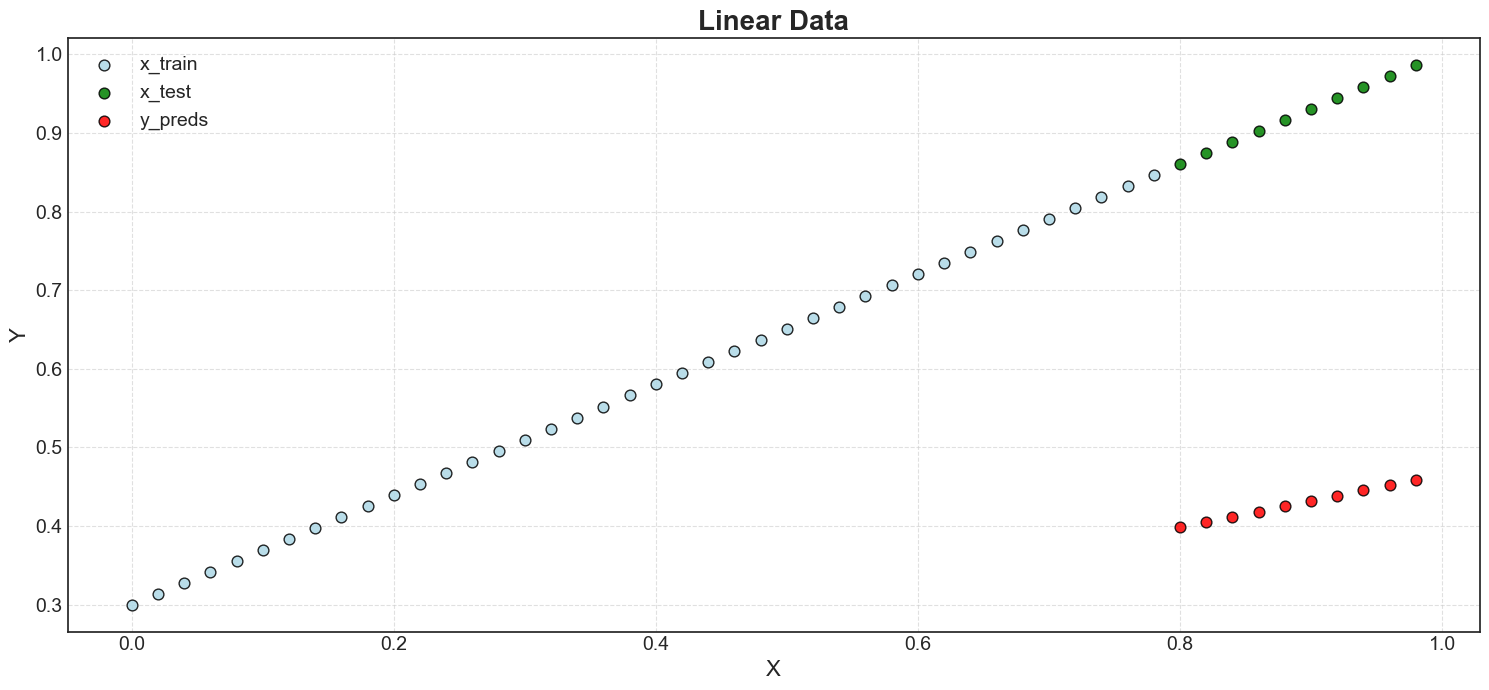

In [186]:
data_init={
    "x_train": (x_train, y_train, "lightblue"),
    "x_test": (x_test, y_test, "green"),
    "y_preds": (x_test, y_preds.cpu(), "red"),
}

plot_labeled_linear_splits(data_init)

In [187]:
# NOTE: This is NOT best practice for inference, but can be useful for debugging or during training.
# Why? Because this code does NOT use torch.inference_mode() or torch.no_grad(), so PyTorch will track gradients.
# Tracking gradients is only needed for training (when you want to compute gradients for backpropagation).
# For inference (making predictions), you should use torch.inference_mode() or torch.no_grad() to save memory and speed up computation.
# Here, we do a forward pass on the training data to inspect the model's raw predictions.
y_pred = linear_model(x_train.to(device))  # Forward pass: get predictions for training data (gradients tracked)
print(f"First 10 predictions on training data: {y_pred[:10]}")

First 10 predictions on training data: tensor([[0.1288],
        [0.1355],
        [0.1423],
        [0.1490],
        [0.1557],
        [0.1625],
        [0.1692],
        [0.1759],
        [0.1827],
        [0.1894]], device='cuda:0', grad_fn=<SliceBackward0>)


In [188]:
# torch.inference_mode() is preferred over torch.no_grad() for inference,
# because it not only disables gradient calculation (like no_grad), but also
# disables version counter updates and some autograd metadata, making inference faster and more memory efficient.
with torch.no_grad():
    y_pred = linear_model(x_train.to(device))  # Forward pass: get predictions for training data (no gradients tracked)
    print(f"First 10 predictions on training data (no_grad): \n{y_pred[:10]}")  # <= Print the first 10 predictions for inspection

First 10 predictions on training data (no_grad): 
tensor([[0.1288],
        [0.1355],
        [0.1423],
        [0.1490],
        [0.1557],
        [0.1625],
        [0.1692],
        [0.1759],
        [0.1827],
        [0.1894]], device='cuda:0')


In [189]:
# Best practice for inference: torch.inference_mode() is preferred over regular forward pass and torch.no_grad()
# because it disables gradient calculation AND version counter updates, making inference faster and more memory efficient.
with torch.inference_mode():
    y_preds = linear_model(x_test.to(device))  # <= Make predictions on the test set using the model
    print(f"Predictions: \n{y_preds[:10]}")  # <= Print the first 10 predictions for inspection

Predictions: 
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], device='cuda:0')


In [190]:
mae = nn.L1Loss()  # Mean Absolute Error loss function
loss = mae(y_preds, y_test.to(device))  # Calculate the loss between predictions and true values
print(f"Loss: {loss.item()}")  # Print the loss value as

Loss: 0.4945361614227295


In [191]:
optimizer = torch.optim.SGD(linear_model.parameters(), lr=0.01)  # Stochastic Gradient Descent optimizer with learning rate 0.01

In [192]:
import copy
# Instantiate the model and move it to the target device (CPU or GPU)
torch.manual_seed(SEED)  # Set a random seed for reproducibility
model_0=LinearRegressionModel().to(device)  # Create a new instance of the model
old_param=copy.deepcopy(model_0.state_dict().copy()) # Copy the model's parameters to a new variable
old_param

OrderedDict([('weights', tensor([0.3367], device='cuda:0')),
             ('bias', tensor([0.1288], device='cuda:0'))])

In [193]:
# ============================
# 4) DEFINE LOSS FUNCTION
# ============================

# For regression, Mean Absolute Error (L1Loss) or Mean Squared Error (MSELoss) are common.
loss_fn = nn.L1Loss()  # MAE: measures average absolute difference

In [194]:
# ============================
# 5) DEFINE OPTIMIZER
# ============================

# The optimizer updates model parameters using gradients.
# Learning rate controls the size of parameter updates.
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.001)


In [195]:
def plot_loss_curve(epoch_count, loss_values, test_loss_values):
    """
    Plot the training and test loss curves over epochs.
    """
    plt.figure(figsize=(14, 6))
    plt.plot(epoch_count, loss_values, label='Train Loss', color='blue', linewidth=2)
    plt.plot(epoch_count, test_loss_values, label='Test Loss', color='orange', linewidth=2)
    plt.title('Training and Test Loss Curve', fontsize=20, fontweight='bold')
    plt.xlabel('Epoch', fontsize=16)
    plt.ylabel('Loss (MAE)', fontsize=16)
    plt.legend(fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


In [196]:
# Number of complete passes through the training dataset
torch.manual_seed(SEED)  # Set a random seed for reproducibility
epochs = 2000


epoch_count = []  # Initialize epoch count for logging
loss_values = []  # Initialize a list to store loss values for each epoch
test_loss_values = []  # Initialize a list to store test loss values for each epoch

# Training loop: repeat for each epoch
for epoch in range(epochs):

    # === 1) Set the model to TRAINING mode ===
    # This activates behaviors that should only happen during training.
    # Examples:
    #   - Dropout: randomly zeroes some neuron outputs to reduce overfitting.
    #   - BatchNorm: updates running statistics (mean, variance) for normalization.
    # If you don't call .train(), these layers might behave incorrectly!
    model_0.train()


    # === 2) Forward pass ===
    # Compute predicted outputs (y_preds) by passing inputs (x_train) through the model.
    # .to(device) ensures the data is on the same device (CPU or GPU) as the model weights.
    y_preds = model_0(x_train.to(device))


    # === 3) Compute the loss ===
    # Compare predictions (y_preds) with ground truth labels (y_train).
    # The loss function measures how 'wrong' the predictions are.
    # Common choices: MAE (Mean Absolute Error) for regression,
    #                 MSE (Mean Squared Error) for regression,
    #                 CrossEntropy for classification.
    loss = mae(y_preds, y_train.to(device))


    # === 4) Zero the gradients ===
    optimizer.zero_grad()  # Clears old gradients from the last step (otherwise they accumulate)<= This is crucial because gradients accumulate by default in PyTorch.

    # === 5) Backward pass ===
    loss.backward()  # Computes the gradient of the loss w.r.t. model parameters

    # === 6) Update model weights ===
    optimizer.step()  # Applies the gradients to update the parameters



    model_0.eval()  # Set the model to evaluation mode (disables dropout, batch norm updates, etc.)

    with torch.inference_mode():
        # === 7) Make predictions on the test set ===
        y_test_preds = model_0(x_test.to(device))
        test_loss = mae(y_test_preds, y_test.to(device))


    # === g) (Optional) Log progress ===
    if (epoch + 1) % 10 == 0 or epoch == 0:
        epoch_count.append(epoch)
        loss_values.append(loss.item())
        test_loss_values.append(test_loss.item())


        _weights = model_0.weights.to(device).item()
        _bias = model_0.bias.to(device).item()

        print(
            f"[Epoch {epoch + 1:>4}/{epochs}] "
            f"| Train Loss: {loss.item():.6f} "
            f"| Test Loss: {test_loss.item():.6f} "
            f"| Weights: {_weights:.6f} "
            f"| Bias: {_bias:.6f}"
        )




[Epoch    1/2000] | Train Loss: 0.312881 | Test Loss: 0.493189 | Weights: 0.337080 | Bias: 0.129809
[Epoch   10/2000] | Train Loss: 0.302512 | Test Loss: 0.481065 | Weights: 0.340590 | Bias: 0.138809
[Epoch   20/2000] | Train Loss: 0.290991 | Test Loss: 0.467594 | Weights: 0.344490 | Bias: 0.148809
[Epoch   30/2000] | Train Loss: 0.279471 | Test Loss: 0.454123 | Weights: 0.348390 | Bias: 0.158809


[Epoch   40/2000] | Train Loss: 0.267949 | Test Loss: 0.440652 | Weights: 0.352290 | Bias: 0.168809
[Epoch   50/2000] | Train Loss: 0.256428 | Test Loss: 0.427181 | Weights: 0.356190 | Bias: 0.178810
[Epoch   60/2000] | Train Loss: 0.244907 | Test Loss: 0.413710 | Weights: 0.360090 | Bias: 0.188810
[Epoch   70/2000] | Train Loss: 0.233387 | Test Loss: 0.400239 | Weights: 0.363990 | Bias: 0.198810
[Epoch   80/2000] | Train Loss: 0.221866 | Test Loss: 0.386768 | Weights: 0.367890 | Bias: 0.208810
[Epoch   90/2000] | Train Loss: 0.210345 | Test Loss: 0.373298 | Weights: 0.371790 | Bias: 0.218810
[Epoch  100/2000] | Train Loss: 0.198824 | Test Loss: 0.359827 | Weights: 0.375690 | Bias: 0.228810
[Epoch  110/2000] | Train Loss: 0.187303 | Test Loss: 0.346356 | Weights: 0.379590 | Bias: 0.238810
[Epoch  120/2000] | Train Loss: 0.175782 | Test Loss: 0.332885 | Weights: 0.383490 | Bias: 0.248810
[Epoch  130/2000] | Train Loss: 0.164261 | Test Loss: 0.319414 | Weights: 0.387389 | Bias: 0.258810


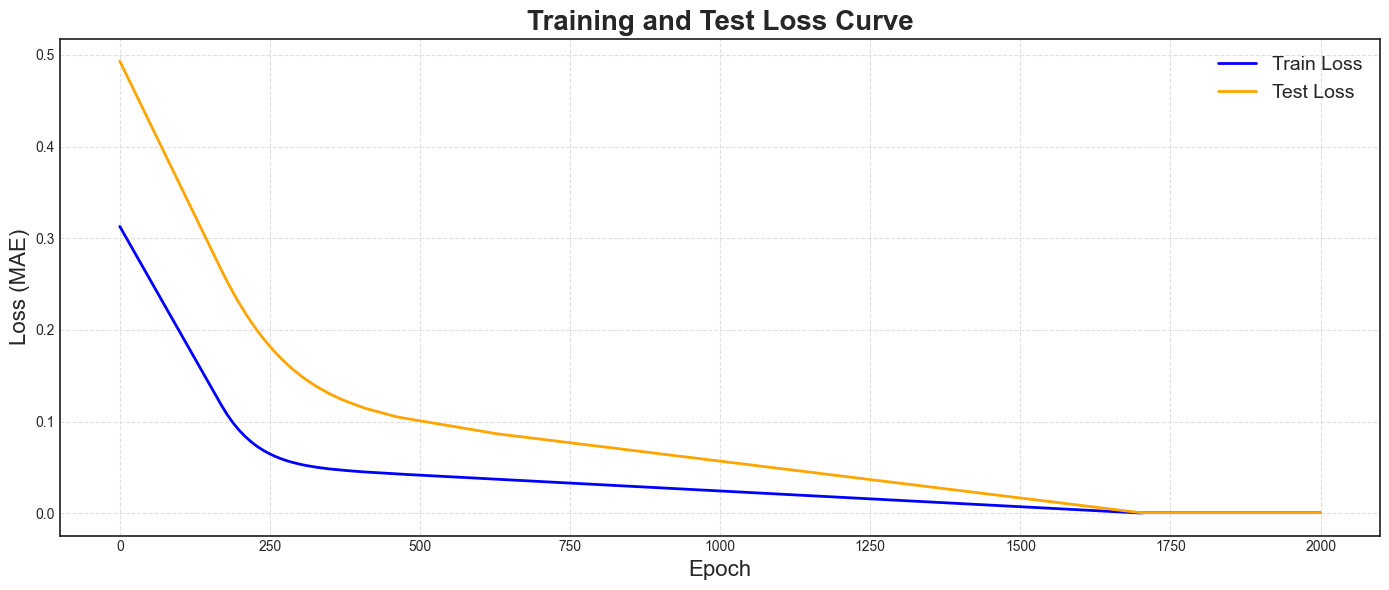

In [197]:
plot_loss_curve(epoch_count, loss_values, test_loss_values)


In [198]:
WEIGHTS, BIAS

(0.7, 0.3)

In [199]:
old_param

OrderedDict([('weights', tensor([0.3367], device='cuda:0')),
             ('bias', tensor([0.1288], device='cuda:0'))])

In [200]:
model_0.state_dict()  # Returns a dictionary containing the model's parameters and buffers

OrderedDict([('weights', tensor([0.6994], device='cuda:0')),
             ('bias', tensor([0.2998], device='cuda:0'))])

In [201]:
model_0.eval()  # Set the model to evaluation mode (disables dropout, batch norm updates, etc.)
with torch.inference_mode():
    y_preds = model_0(x_test.to(device))  # Make predictions on the test set using the model
    print(f"Predictions: \n{y_preds[:10]}")  # Print the first 10 predictions for inspection

Predictions: 
tensor([[0.8593],
        [0.8733],
        [0.8873],
        [0.9013],
        [0.9152],
        [0.9292],
        [0.9432],
        [0.9572],
        [0.9712],
        [0.9852]], device='cuda:0')


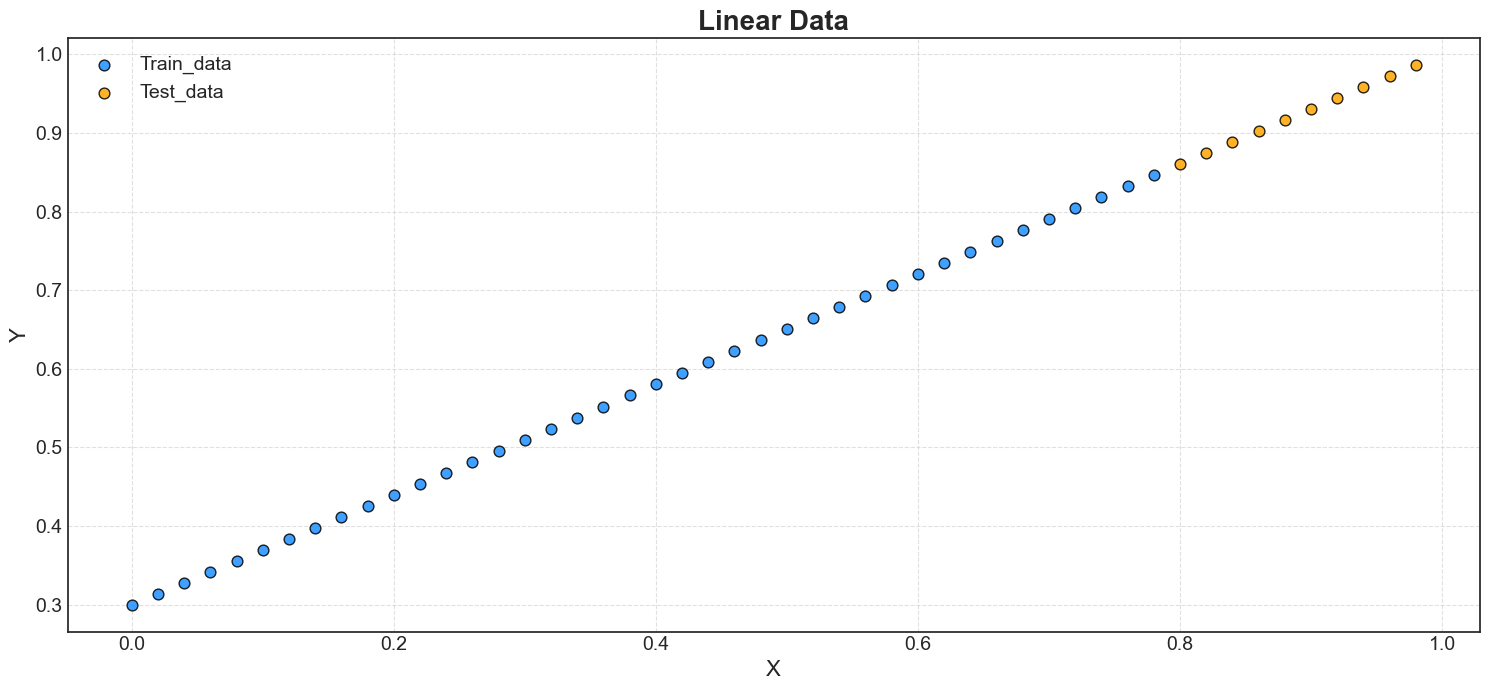

In [202]:
plot_labeled_linear_splits(data_dict)

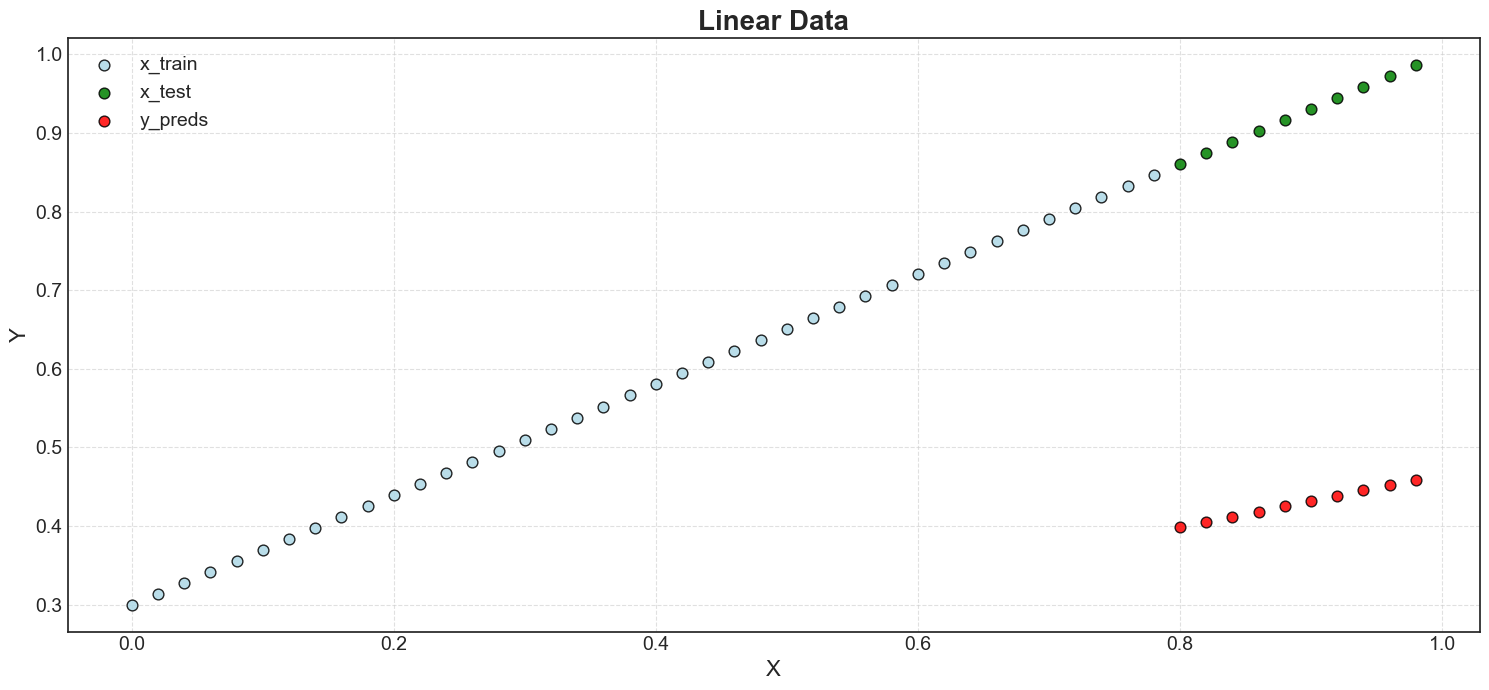

In [203]:
plot_labeled_linear_splits(data_init)

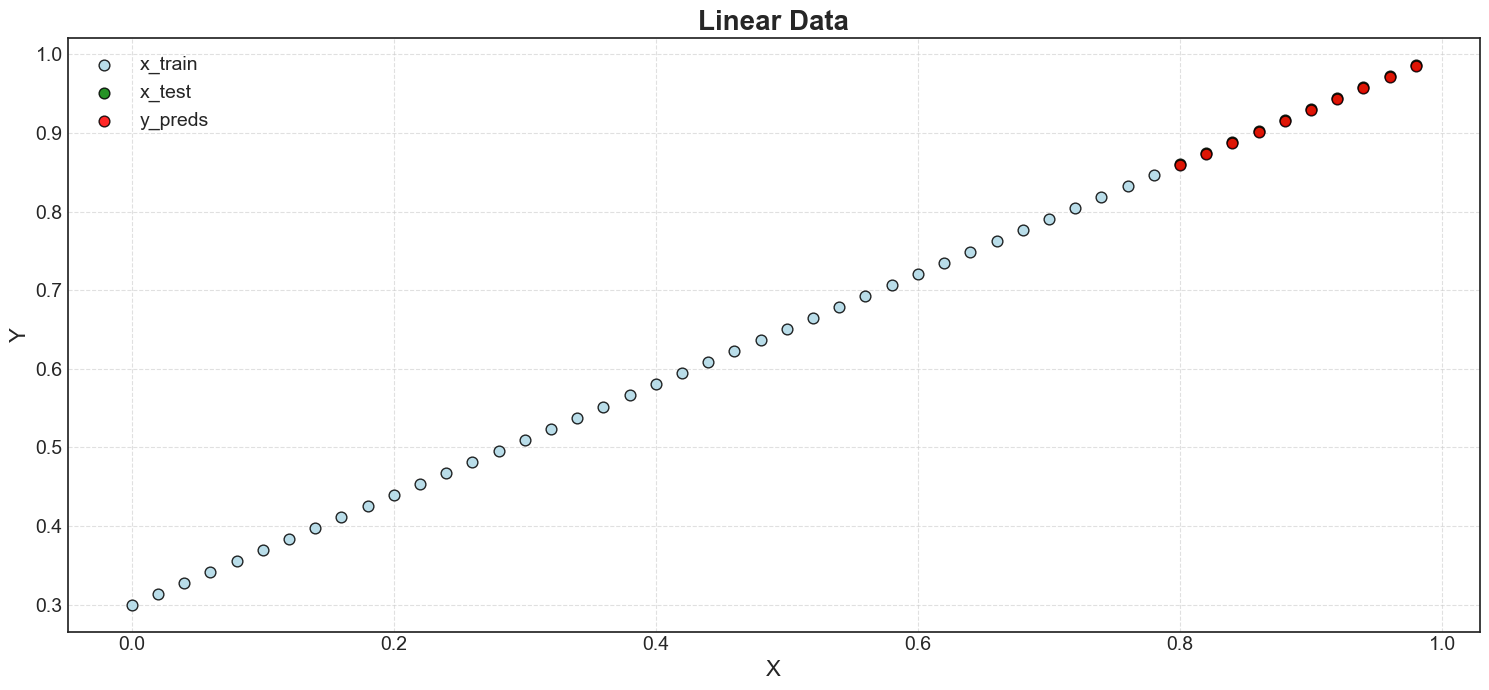

In [204]:
data={
    "x_train": (x_train, y_train, "lightblue"),
    "x_test": (x_test, y_test, "green"),
    "y_preds": (x_test, y_preds.cpu(), "red"),
}
plot_labeled_linear_splits(data)

In [205]:
# Save weights only
torch.save(model_0.state_dict(), "01_PyTorch_Workflow\models\model_0.pth")


In [206]:
#load and use the model
loaded_model_0 = LinearRegressionModel().to(device)  # Create a new instance of the model
loaded_model_0.load_state_dict(torch.load("01_PyTorch_Workflow\models\model_0.pth", map_location=device,weights_only=True))  # Load the saved weights into the new model instance
loaded_model_0.eval()  # Set the model to evaluation mode (disables dropout, batch norm updates, etc.)
with torch.inference_mode():
    y_preds = loaded_model_0(x_test.to(device))  # Make predictions on the test set using the model
    print(f"Predictions: \n{y_preds[:10]}")  # Print the first 10 predictions for inspection

Predictions: 
tensor([[0.8593],
        [0.8733],
        [0.8873],
        [0.9013],
        [0.9152],
        [0.9292],
        [0.9432],
        [0.9572],
        [0.9712],
        [0.9852]], device='cuda:0')


In [208]:
loaded_model_0.state_dict()  # Returns a dictionary containing the model's parameters and buffers

OrderedDict([('weights', tensor([0.6994], device='cuda:0')),
             ('bias', tensor([0.2998], device='cuda:0'))])

In [207]:
# Save entire model
torch.save(model_0, '01_PyTorch_Workflow\models\model_whole_0.pth')